# NCAA TRACK & FIELD 1500M ANALYSIS

## Imports/Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy.stats as st

In [2]:
data = pd.read_excel('ncaa_1500m_results.xlsx')
data.head()

,runner_id,ncaa_year,full_name,school_name,school_conference,class_year,result,time,home_country,home_state
0,1,2022,Joe Waskom,Washington,PAC 12,2,1,3.45.58,USA,WA
1,2,2022,Mario Garcia Romo,Ole Miss,SEC,3,2,3.45.69,SPAIN,NaN
2,3,2022,Sam Ellis,Princeton,IVY,4,3,3.45.82,GEORGIA,NaN
3,4,2022,Thomas Vanoppen,Wake Forest,ACC,3,4,3.46.03,BELGIUM,NaN
4,5,2022,Luke Houser,Washington,PAC 12,2,5,3.46.13,USA,WA


## Extract Only the Top 8 Finishers for Each Year and Reassign DataFrame
Decided to keep only the top 8 finishers each year since these are the athletes who scored points for their team and since the NCAA records only record the top 8 finishers once you get to ~2005.

In [3]:
data = data.loc[data['result'] <= 8]

## Convert 1500m Time to Total Seconds and Find Converted Mile Time in Seconds
Take each athlete's 1500m time and multiply by 1.08

In [4]:
def seconds(x):
    mins, secs, millis = map(float, x.split('.'))
    td = timedelta(minutes = mins, seconds = secs, milliseconds = millis)
    return td.total_seconds()

In [5]:
data['1500m_seconds'] = data['time'].apply(seconds).round(2)
data['mile_seconds'] = (data['1500m_seconds'] * 1.08).round(2)

In [6]:
data['+_sec_for_mile'] = round(data['mile_seconds'] - data['1500m_seconds'], 2)
data.sort_values(by = '+_sec_for_mile')

,runner_id,ncaa_year,full_name,school_name,school_conference,class_year,result,time,home_country,home_state,1500m_seconds,mile_seconds,+_sec_for_mile
377,266,1981,Sydney Maree,Villanova,BIG EAST,4,1,3.35.30,SOUTH AFRICA,NaN,215.03,232.23,17.20
12,13,2021,Cole Hocker,Oregon,PAC 12,1,1,3.35.35,USA,IN,215.04,232.24,17.20
13,14,2021,Yared Nuguse,Notre Dame,ACC,3,2,3.35.60,USA,KY,215.06,232.26,17.20
329,229,1987,Abdi Bile,George Mason,ATLANTIC 10,3,1,3.35.79,SOMALIA,NaN,215.08,232.29,17.21
353,247,1984,Joaquim Cruz,Oregon,PAC 12,2,1,3.36.48,BRAZIL,NaN,216.05,233.33,17.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,57,2015,Peter Callahan,New Mexico,MOUNTAIN WEST,4,4,3.55.22,USA,IL,235.02,253.82,18.80
76,53,2015,Jordy Williamsz,Villanova,BIG EAST,3,5,3.55.36,AUSTRALIA,NaN,235.04,253.84,18.80
77,58,2015,Kyle Graves,Wake Forest,ACC,4,6,3.55.39,USA,MD,235.04,253.84,18.80
78,59,2015,Christian Soratos,Montana State,BIG SKY,4,7,3.55.60,USA,CA,235.06,253.86,18.80


## Make a Copy of the Data with Time Reformatted

In [7]:
data_copy = data.copy()

In [8]:
data_copy['time'] = data_copy['time'].str.replace('.', ':', n = 1, regex = False)

## Data Sorted by Time (Fastest to Slowest)

In [9]:
data_copy.sort_values(by = 'time').reset_index(drop = True)

,runner_id,ncaa_year,full_name,school_name,school_conference,class_year,result,time,home_country,home_state,1500m_seconds,mile_seconds,+_sec_for_mile
0,266,1981,Sydney Maree,Villanova,BIG EAST,4,1,3:35.30,SOUTH AFRICA,NaN,215.03,232.23,17.20
1,13,2021,Cole Hocker,Oregon,PAC 12,1,1,3:35.35,USA,IN,215.04,232.24,17.20
2,14,2021,Yared Nuguse,Notre Dame,ACC,3,2,3:35.60,USA,KY,215.06,232.26,17.20
3,229,1987,Abdi Bile,George Mason,ATLANTIC 10,3,1,3:35.79,SOMALIA,NaN,215.08,232.29,17.21
4,48,2016,Clayton Murphy,Akron,MAC,3,1,3:36.38,USA,OH,216.04,233.32,17.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,57,2015,Peter Callahan,New Mexico,MOUNTAIN WEST,4,4,3:55.22,USA,IL,235.02,253.82,18.80
396,53,2015,Jordy Williamsz,Villanova,BIG EAST,3,5,3:55.36,AUSTRALIA,NaN,235.04,253.84,18.80
397,58,2015,Kyle Graves,Wake Forest,ACC,4,6,3:55.39,USA,MD,235.04,253.84,18.80
398,59,2015,Christian Soratos,Montana State,BIG SKY,4,7,3:55.60,USA,CA,235.06,253.86,18.80


## Make Bins for Race Times and Count Values

In [10]:
data_copy['race_time_bins'] = pd.cut(x = data_copy['1500m_seconds'], bins = [0, 218, 221, 226, 300],
                                        labels = ['Sub 3:38', '3:38-3:40', '3:41-3:45', 
                                                  '3:46+'])

In [11]:
data_copy.sort_values(by = 'time').value_counts('race_time_bins').sort_index()

race_time_bins
Sub 3:38      26
3:38-3:40    132
3:41-3:45    180
3:46+         62
dtype: int64

## Make a Column With Total Points Scored
Scoring Breakdown:
- 1st: 10 points 
- 2nd: 8 points 
- 3rd: 6 points 
- 4th: 5 points 
- 5th: 4 points 
- 6th: 3 points 
- 7th: 2 points 
- 8th: 1 point

In [12]:
data_copy['points_scored'] = [10 if x == 1 else 8 if x == 2 else 6 if x == 3 else 5 if x == 4 else 4 if x == 5 else 3 if x == 6 else 2 if x == 7 else 1 for x in data_copy['result']]

## Rank of Schools by Total Points Scored

In [13]:
data_copy.groupby(['school_name'])[['points_scored']].agg('sum').sort_values(by = 'points_scored', ascending = False).head(40)

,points_scored
school_name,
Arkansas,202
Oregon,162
Villanova,125
Stanford,106
Wisconsin,79
Indiana,73
Georgetown,51
Texas,43
New Mexico,41


## Rank of Conference by Total Points Scored

In [14]:
data_copy.groupby(['school_conference'])[['points_scored']].agg('sum').sort_values(by = 'points_scored', ascending = False)

,points_scored
school_conference,
PAC 12,362
SEC,270
BIG 10,267
BIG EAST,174
BIG 12,171
ACC,119
INDEPENDENT,81
MOUNTAIN WEST,80
MAC,68


## Rank of Athletes by Points Scored

In [15]:
data_copy.groupby(['runner_id', 'full_name', 'school_name'])[['points_scored']].agg('sum').sort_values(by = 'points_scored', ascending = False).head(40)

,,,points_scored
runner_id,full_name,school_name,
111,Leo Manzano,Texas,33
165,Seneca Lassiter,Arkansas,28
153,Bryan Berryhill,Colorado State,28
135,Chris Mulvaney,Arkansas,26
154,Gabe Jennings,Stanford,26
235,Dub Myers,Oregon,25
267,Todd Harbour,Baylor,24
266,Sydney Maree,Villanova,24
172,Kevin Sullivan,Michigan,24


## Count & Percent of Schools with Runners Who Scored in NCAA 1500M Final (Top 8)

In [16]:
data_copy['school_name'].value_counts().head(20)

Arkansas            39
Villanova           26
Oregon              25
Stanford            21
Wisconsin           17
Georgetown          15
Indiana             11
Texas                8
Ole Miss             7
New Mexico           7
Eastern Michigan     6
Virginia Tech        6
Colorado State       6
Notre Dame           6
BYU                  6
Washington           6
Oklahoma State       6
Providence           6
Washington State     5
Minnesota            5
Name: school_name, dtype: int64

In [17]:
(data_copy['school_name'].value_counts(normalize = True).round(3)*100).head(20)

Arkansas            9.8
Villanova           6.5
Oregon              6.2
Stanford            5.2
Wisconsin           4.2
Georgetown          3.8
Indiana             2.8
Texas               2.0
Ole Miss            1.8
New Mexico          1.8
Eastern Michigan    1.5
Virginia Tech       1.5
Colorado State      1.5
Notre Dame          1.5
BYU                 1.5
Washington          1.5
Oklahoma State      1.5
Providence          1.5
Washington State    1.2
Minnesota           1.2
Name: school_name, dtype: float64

## Make a Column with the Count of Total Top 8 Appearances for Each Runner

In [18]:
data_copy['total_appearances'] = data_copy.groupby(by = 'runner_id')['runner_id'].transform('count')

## Count & Percent of Schools with a Top 3 Finisher

In [19]:
medalists = data_copy.loc[data['result'] <= 3].sort_values(by = 'time').reset_index(drop = True)

In [20]:
medalists['school_name'].value_counts()

Arkansas            16
Oregon              15
Stanford             9
Indiana              8
Villanova            6
Colorado State       5
Wisconsin            5
Providence           4
New Mexico           4
George Mason         3
Mt. Saint Mary's     3
Illinois             3
Eastern Michigan     3
Baylor               3
Michigan             3
Ole Miss             3
BYU                  3
Oklahoma State       3
Texas                3
Georgetown           2
UC Irvine            2
Virginia             2
UCLA                 2
Oregon State         2
Air Force            2
Notre Dame           2
Arizona              2
Washington           2
Clemson              2
Michigan State       2
UTEP                 2
SMU                  1
Akron                1
ETSU                 1
William & Mary       1
Princeton            1
NC State             1
Oklahoma             1
Kansas State         1
Northeastern         1
Manhattan            1
Emporia State        1
South Alabama        1
Alabama    

In [21]:
medalists['school_name'].value_counts(normalize = True).round(3)*100

Arkansas            10.7
Oregon              10.0
Stanford             6.0
Indiana              5.3
Villanova            4.0
Colorado State       3.3
Wisconsin            3.3
Providence           2.7
New Mexico           2.7
George Mason         2.0
Mt. Saint Mary's     2.0
Illinois             2.0
Eastern Michigan     2.0
Baylor               2.0
Michigan             2.0
Ole Miss             2.0
BYU                  2.0
Oklahoma State       2.0
Texas                2.0
Georgetown           1.3
UC Irvine            1.3
Virginia             1.3
UCLA                 1.3
Oregon State         1.3
Air Force            1.3
Notre Dame           1.3
Arizona              1.3
Washington           1.3
Clemson              1.3
Michigan State       1.3
UTEP                 1.3
SMU                  0.7
Akron                0.7
ETSU                 0.7
William & Mary       0.7
Princeton            0.7
NC State             0.7
Oklahoma             0.7
Kansas State         0.7
Northeastern         0.7


## Count & Percent of Schools with a 1500m NCAA Champion

In [22]:
winners = data_copy.loc[data_copy['result'] == 1].sort_values(by = 'time').reset_index(drop = True)

In [23]:
winners['school_name'].value_counts()

Oregon              8
Arkansas            6
Villanova           5
Indiana             3
Stanford            3
George Mason        2
Oklahoma State      2
Illinois            2
Texas               2
Northern Arizona    1
South Alabama       1
SMU                 1
Colorado State      1
Wisconsin           1
Washington State    1
New Mexico          1
Oregon State        1
Bowling Green       1
Akron               1
Mt. Saint Mary's    1
Notre Dame          1
UC Irvine           1
Georgetown          1
UTEP                1
Washington          1
Michigan            1
Name: school_name, dtype: int64

In [24]:
winners['school_name'].value_counts(normalize = True).round(3)*100

Oregon              16.0
Arkansas            12.0
Villanova           10.0
Indiana              6.0
Stanford             6.0
George Mason         4.0
Oklahoma State       4.0
Illinois             4.0
Texas                4.0
Northern Arizona     2.0
South Alabama        2.0
SMU                  2.0
Colorado State       2.0
Wisconsin            2.0
Washington State     2.0
New Mexico           2.0
Oregon State         2.0
Bowling Green        2.0
Akron                2.0
Mt. Saint Mary's     2.0
Notre Dame           2.0
UC Irvine            2.0
Georgetown           2.0
UTEP                 2.0
Washington           2.0
Michigan             2.0
Name: school_name, dtype: float64

## Count & Percent of Class Year in the NCAA 1500m Finals

In [25]:
data_copy['class_year'].value_counts().sort_index()

0      1
1     22
2     86
3    138
4    153
Name: class_year, dtype: int64

In [26]:
(data_copy['class_year'].value_counts(normalize = True).round(3)*100).sort_index()

0     0.2
1     5.5
2    21.5
3    34.5
4    38.2
Name: class_year, dtype: float64

## Count & Percent of Champions by Class Year
0: Unknown
1: Freshman
2: Sophomore
3: Junior
4: Senior

In [27]:
winners['class_year'].value_counts().sort_index()

1     3
2    13
3    18
4    16
Name: class_year, dtype: int64

In [28]:
(winners['class_year'].value_counts(normalize = True).round(3)*100).sort_index()

1     6.0
2    26.0
3    36.0
4    32.0
Name: class_year, dtype: float64

## Count & Percent of Conferences With a Top 8 Finisher

In [29]:
data_copy['school_conference'].value_counts()

PAC 12                    68
SEC                       56
BIG 10                    54
BIG EAST                  41
BIG 12                    31
ACC                       26
INDEPENDENT               17
MAC                       13
MOUNTAIN WEST             13
WAC                        9
BIG SKY                    7
ATLANTIC 10                7
MOUNTAIN PACIFIC           5
CAA                        5
NORTHEAST CONFERENCE       5
CONFERENCE USA             5
SOUTHWEST CONFERENCE       4
SOUTHERN CONFERENCE        4
IVY                        4
PATRIOT LEAGUE             4
SUN BELT                   3
MISSORI VALLEY             2
AMERICAN                   2
CCAA                       2
PCAA                       2
AMERICAN EAST              2
WCC                        1
CIAC                       1
AAWU                       1
FWC                        1
MAAC                       1
NESCAC                     1
OHIO VALLEY CONFERENCE     1
SWC                        1
SCIAC         

In [30]:
data_copy['school_conference'].value_counts(normalize = True).round(3)*100

PAC 12                    17.0
SEC                       14.0
BIG 10                    13.5
BIG EAST                  10.2
BIG 12                     7.8
ACC                        6.5
INDEPENDENT                4.2
MAC                        3.2
MOUNTAIN WEST              3.2
WAC                        2.2
BIG SKY                    1.8
ATLANTIC 10                1.8
MOUNTAIN PACIFIC           1.2
CAA                        1.2
NORTHEAST CONFERENCE       1.2
CONFERENCE USA             1.2
SOUTHWEST CONFERENCE       1.0
SOUTHERN CONFERENCE        1.0
IVY                        1.0
PATRIOT LEAGUE             1.0
SUN BELT                   0.8
MISSORI VALLEY             0.5
AMERICAN                   0.5
CCAA                       0.5
PCAA                       0.5
AMERICAN EAST              0.5
WCC                        0.2
CIAC                       0.2
AAWU                       0.2
FWC                        0.2
MAAC                       0.2
NESCAC                     0.2
OHIO VAL

## Count and Percent of Countries With a Top 8 Finisher

If the same runner ran in the 1500m final in multiple years, I am only counting their country value once

In [31]:
data_dropdups = data_copy.drop_duplicates('runner_id', keep = 'first').reset_index(drop = True)
data_dropdups['home_country'].value_counts()

USA               194
KENYA              17
UNITED KINGDOM     15
IRELAND            11
AUSTRALIA           9
CANADA              8
NETHERLANDS         4
SOUTH AFRICA        4
SOMALIA             4
SPAIN               2
JAMAICA             2
NEW ZEALAND         2
NORWAY              2
ZIMBABWE            1
BRAZIL              1
VA                  1
HUNGARY             1
SUDAN               1
GEORGIA             1
UGANDA              1
BELGIUM             1
Name: home_country, dtype: int64

In [32]:
data_dropdups['home_country'].value_counts(normalize = True).round(3)*100

USA               68.8
KENYA              6.0
UNITED KINGDOM     5.3
IRELAND            3.9
AUSTRALIA          3.2
CANADA             2.8
NETHERLANDS        1.4
SOUTH AFRICA       1.4
SOMALIA            1.4
SPAIN              0.7
JAMAICA            0.7
NEW ZEALAND        0.7
NORWAY             0.7
ZIMBABWE           0.4
BRAZIL             0.4
VA                 0.4
HUNGARY            0.4
SUDAN              0.4
GEORGIA            0.4
UGANDA             0.4
BELGIUM            0.4
Name: home_country, dtype: float64

## Count and Percent of American Runners' Home States

If the same runner ran in the 1500m final in multiple years, I am only counting their state value once

In [33]:
americans = data_copy.loc[data['home_country'] == 'USA']
americans = americans.drop_duplicates(['runner_id'], keep = 'first').reset_index(drop = True)

In [34]:
americans['home_state'].value_counts()

CA    21
IL    13
NY    12
PA    11
VA    11
TX    10
MD     9
MI     8
WI     7
OH     7
OR     6
WA     6
UT     6
IN     6
MN     5
KS     4
MO     4
NC     4
NJ     3
MA     3
CT     3
AZ     3
ID     3
LA     3
MT     2
RI     2
FL     2
NH     2
SC     2
ME     2
CO     2
IA     2
TN     1
NM     1
KY     1
SD     1
ND     1
GA     1
NV     1
VT     1
AL     1
Name: home_state, dtype: int64

In [35]:
americans['home_state'].value_counts(normalize = True).round(3)*100

CA    10.9
IL     6.7
NY     6.2
PA     5.7
VA     5.7
TX     5.2
MD     4.7
MI     4.1
WI     3.6
OH     3.6
OR     3.1
WA     3.1
UT     3.1
IN     3.1
MN     2.6
KS     2.1
MO     2.1
NC     2.1
NJ     1.6
MA     1.6
CT     1.6
AZ     1.6
ID     1.6
LA     1.6
MT     1.0
RI     1.0
FL     1.0
NH     1.0
SC     1.0
ME     1.0
CO     1.0
IA     1.0
TN     0.5
NM     0.5
KY     0.5
SD     0.5
ND     0.5
GA     0.5
NV     0.5
VT     0.5
AL     0.5
Name: home_state, dtype: float64

## Top Ranked US States by Total Points Scored

In [36]:
data_copy.groupby(['home_state'])[['points_scored']].agg('sum').sort_values(by = 'points_scored', ascending = False).head(40)

,points_scored
home_state,
CA,158
IL,102
NY,99
OR,83
TX,81
VA,64
IN,61
WI,60
MD,55


## Repeat Champions

In [37]:
repeat_champs = winners.loc[winners['runner_id'].duplicated(keep = False)].sort_values(by = ['ncaa_year', 'full_name']).reset_index(drop = True)
repeat_champs[['full_name', 'school_name', 'ncaa_year', 'time']]

,full_name,school_name,ncaa_year,time
0,Sydney Maree,Villanova,1980,3:38.64
1,Sydney Maree,Villanova,1981,3:35.30
2,Abdi Bile,George Mason,1985,3:41.62
3,Abdi Bile,George Mason,1987,3:35.79
4,Marko Koers,Illinois,1993,3:38.05
5,Marko Koers,Illinois,1996,3:37.57
6,Seneca Lassiter,Arkansas,1997,3:40.22
7,Seneca Lassiter,Arkansas,1998,3:42.34
8,Leo Manzano,Texas,2005,3:37.13
9,Leo Manzano,Texas,2008,3:41.25


## Repeat Medalists

In [38]:
repeat_medalists = medalists.loc[medalists['runner_id'].duplicated(keep = False)].sort_values(by = ['full_name', 'ncaa_year']).reset_index(drop = True)
repeat_medalists.value_counts('full_name')

full_name
Bryan Berryhill       4
Kevin Sullivan        3
Chris Mulvaney        3
Todd Harbour          3
Gabe Jennings         3
Seneca Lassiter       3
Leo Manzano           3
Marko Koers           2
Yared Nuguse          2
Wilson Waigwa         2
Sydney Maree          2
Steve Scott           2
Peter Rono            2
Matthew Centrowitz    2
Abdi Bile             2
Mac Fleet             2
Bob Kennedy           2
Justine Kiprotich     2
Josh Kerr             2
Jim Spivey            2
Dub Myers             2
Dorian Ulrey          2
Donald Sage           2
Charles Marsala       2
Zach Perkins          2
dtype: int64

## Runners Who Finished Top 8 in NCAA 1500m Finals 3 Times

In [39]:
three_appearances = data_copy.loc[data_copy['total_appearances'] == 3].sort_values(by = ['full_name', 'ncaa_year']).reset_index(drop=True)
three_appearances[['full_name', 'school_name', 'ncaa_year', 'time', 'result']].sort_values(by = ['full_name', 'ncaa_year'])

,full_name,school_name,ncaa_year,time,result
0,Bernard Lagat,Washington State,1997,3:42.12,4
1,Bernard Lagat,Washington State,1998,3:46.88,8
2,Bernard Lagat,Washington State,1999,3:48.88,4
3,Chris Mulvaney,Arkansas,2002,3:43.03,2
4,Chris Mulvaney,Arkansas,2003,3:40.44,2
5,Chris Mulvaney,Arkansas,2004,3:44.72,1
6,Daniel Kinyua,Mt. Saint Mary's,1997,3:43.00,7
7,Daniel Kinyua,Mt. Saint Mary's,1998,3:43.91,4
8,Daniel Kinyua,Iowa State,2000,3:41.26,6
9,Donald Sage,Stanford,2001,3:39.27,5


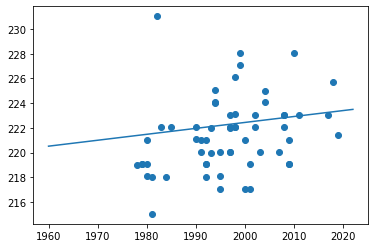

In [40]:
x1 = data_copy['ncaa_year']
y1 = data_copy['1500m_seconds']
plt.scatter(data = three_appearances, x = 'ncaa_year', y = '1500m_seconds')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)))
plt.show()

## Runners Who Finished Top 8 in NCAA 1500m Finals 4 Times

In [41]:
four_appearances = data_copy.loc[data_copy['total_appearances'] == 4].sort_values(by = ['ncaa_year', 'full_name']).reset_index(drop=True)
four_appearances[['full_name', 'school_name', 'ncaa_year', 'time', 'result']]

,full_name,school_name,ncaa_year,time,result
0,Dub Myers,Oregon,1983,3:41.92,5
1,Dub Myers,Oregon,1984,3:37.94,3
2,Dub Myers,Oregon,1985,3:42.93,4
3,Dub Myers,Oregon,1986,3:41.72,1
4,Bryan Berryhill,Colorado State,1998,3:42.66,3
5,Bryan Berryhill,Colorado State,1999,3:48.21,3
6,Bryan Berryhill,Colorado State,2000,3:40.37,3
7,Bryan Berryhill,Colorado State,2001,3:37.05,1
8,Leo Manzano,Texas,2005,3:37.13,1
9,Leo Manzano,Texas,2006,3:44.59,4


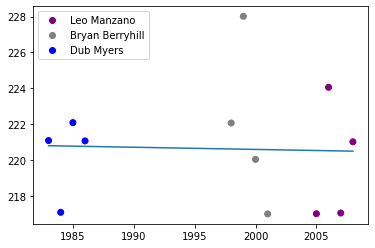

In [42]:
x2 = four_appearances['ncaa_year']
y2 = four_appearances['1500m_seconds']
classes = ['Leo Manzano', 'Bryan Berryhill', 'Dub Myers']
values = four_appearances['runner_id']
colors = ListedColormap(['purple', 'gray', 'blue'])
scatter = plt.scatter(x2, y2, c = values, cmap = colors)
plt.legend(handles = scatter.legend_elements()[0], labels = classes, loc = 'upper left')
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)))

## Visualize Race Time Trend Over the Years

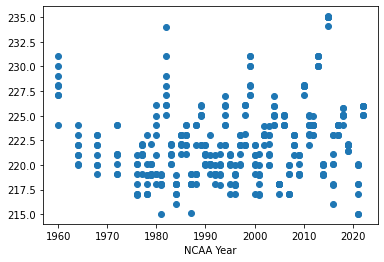

In [43]:
x3 = four_appearances['ncaa_year']
y3 = four_appearances['1500m_seconds']
plt.scatter(data = data_copy, x = 'ncaa_year', y = '1500m_seconds')
plt.xlabel('NCAA Year')
plt.show()

## Histogram of Race Times in Seconds

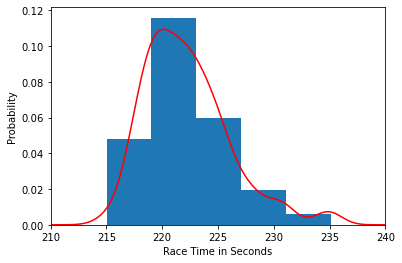

In [44]:
x = data_copy['1500m_seconds']
plt.hist(x, density = True, bins = 5)
plt.xlim(210, 240)
plt.ylabel('Probability')
plt.xlabel('Race Time in Seconds')

kde_xs = np.linspace(210, 240, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label = 'PDF', color = 'red')

## Convert to Excel

In [46]:
data_copy.to_excel('ncaa_1500m_updated.xlsx')